In [230]:
#Import the Packages

import numpy as np
import numpy.random as rnd # Simulate the rv
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplot
import time

(10000, 101)


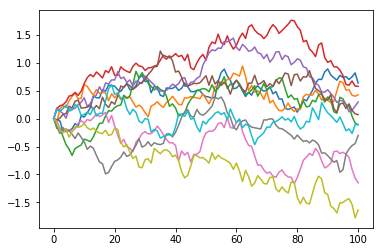

In [231]:
#### Exercise 1
### Generate 10,000 Wiener process paths in the interval [0,1] with 100 equal simulation steps
### Draw the first 10 paths

n_paths = 10000
n_steps = 100
dt = 1/n_steps

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1) 
paths=np.full((n_paths,n_steps+1),0.0) # build the n_paths by n_steps+1 matrix of 0 (S0, initial value)

for i in range(n_paths):
    for j in range(n_steps):
        paths[i,j+1] = paths[i,j] + np.sqrt(dt)*N[i,j]

print(paths.shape)

plt.plot(np.transpose(paths[0:10,]))

plt.show()


In [232]:
paths[0:10,100]


array([ 0.6351071 ,  0.42639063, -0.11183359,  0.57712903,  0.29565741,
        0.07178785, -1.14785888, -0.30160388, -1.63640271, -0.10431011])

In [233]:
paths[0:9,100]

array([ 0.6351071 ,  0.42639063, -0.11183359,  0.57712903,  0.29565741,
        0.07178785, -1.14785888, -0.30160388, -1.63640271])

(10000, 101)


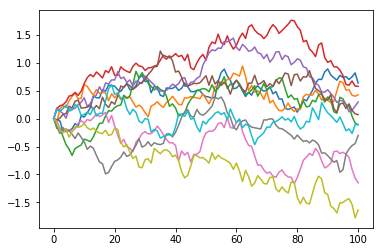

In [234]:
### Exercise 2
### Generate 10,000 Wiener process paths in the interval [0,1] with 100 equal simulation steps 
### using the cumsum and apply functions. Draw the first 10 paths.

#n_paths = 10000
#n_steps = 100
#dt = 1/n_steps

#N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1) 

N=np.sqrt(dt)*N #update


paths=np.cumsum(N, axis=1)
paths

paths=np.c_[np.full((n_paths,1),0.0) ,paths]

print(paths.shape)

plt.plot(np.transpose(paths[0:10,0:101]))


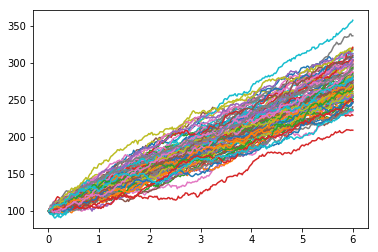

In [235]:
### Exercise 3
### Generate 100 paths of the generalized Wiener process on the interval [0,6] (e.g. 6 years) with initial value 100
### with 50 simulation steps per year a=30.0, b=10.0, based on the same samples from the normal distribution.  
### Plot the paths

n_paths = 100
T = 6
n_steps_per_year = 50
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
S0 = 100.0
a=30.0
b=10.0

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)
paths=np.full((n_paths,n_steps+1),S0) # build the n_paths by n_steps+1 matrix of S0 (initial value)
    
for i in range(n_paths):
    for j in range(n_steps):
        paths[i,j+1] = paths[i,j] + a*dt + b*np.sqrt(dt)*N[i,j]  

  




t=np.r_[0,np.cumsum([dt] * n_steps)]


plt.plot(t,paths.T)


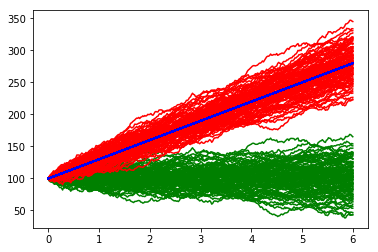

In [236]:
### Exercise 4
### Generate 100 paths of the generalized Wiener process on the interval [0,6] (e.g. 6 years) with inital value 100
### with 50 simulation steps per year based on the same samples from the normal distribution. 
### Build a function of a and b with
### 1) a=0.0, b=10.0, 
### 2) a=30.0, b=0.0,
### 3) a=30.0, b=10.0,
### Compare

n_paths = 100
T = 6
n_steps_per_year = 50
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
S0 = 100.0

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)

def Generalized_Wiener_Process(a,b):
    paths=np.full((n_paths,n_steps+1),S0) # build the n_paths by n_steps+1 matrix of S0 (initial value)
    for i in range(n_paths):
        for j in range(n_steps):
            paths[i,j+1] = paths[i,j] + a*dt + b*np.sqrt(dt)*N[i,j]  

    return paths


Standard=Generalized_Wiener_Process(a=0.0, b=10.0)
Drift=Generalized_Wiener_Process(a=30.0, b=0.0)
General=Generalized_Wiener_Process(a=30.0, b=10.0)

t=np.r_[0,np.cumsum([dt] * n_steps)]


plt.plot(t,Standard.T,color='g')
plt.plot(t,General.T,color='r')
plt.plot(t,Drift.T,color='b')




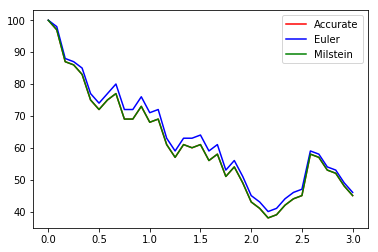

In [237]:
### Exercise 3
### Generate 10,000 paths of geometric Brownian motion (Black-Scholes model) on the interval [0,3] 
### (up to three years) with 12 simulation steps per year with three methods (accurate discretization, 
### Euler discretization and Milstein method) based on the same samples from the normal distribution. 
### Adopt r=0.02, sigma=0.25.
### Compare the first paths obtained by each method in one drawing.

n_paths = 10000
T = 3
n_steps_per_year = 12
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
S0 = 100
r = 0.02
sigma = 0.25

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)
paths1=np.full((n_paths,n_steps+1),S0) # build the n_paths by n_steps+1 matrix of S0 (initial value)
paths2=np.full((n_paths,n_steps+1),S0) # build the n_paths by n_steps+1 matrix of S0 (initial value)
paths3=np.full((n_paths,n_steps+1),S0) # build the n_paths by n_steps+1 matrix of S0 (initial value)

for i in range(n_paths):
    for j in range(n_steps):
        paths1[i,j+1] = paths1[i,j]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*N[i,j]) #Exact discretization
        paths2[i,j+1] = paths2[i,j] + r*paths2[i,j]*dt + sigma*paths2[i,j]*np.sqrt(dt)*N[i,j] #Euler Scheme 
        paths3[i,j+1] = paths3[i,j] + r*paths3[i,j]*dt + sigma*paths3[i,j]*np.sqrt(dt)*N[i,j] + (1/2)*(sigma**2)*paths3[i,j]*dt*(N[i,j]**2-1) #Milstein Scheme

t=np.r_[0,np.cumsum([dt] * n_steps)]



plt.plot(t,paths1[0,],color='r', label='Accurate')
plt.plot(t,paths2[0,],color='b', label='Euler')
plt.plot(t,paths3[0,],color='g', label='Milstein')
plt.legend()


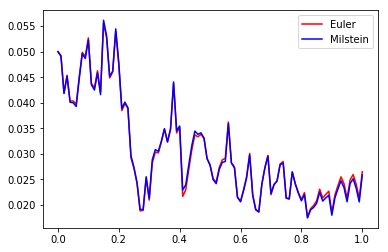

In [238]:
### Exercise 4
### Generate 10,000 CIR process paths (see class notes) in the interval [0,1] 
### with 252 simulation steps (Euler and Milstein Scheme) based on 
### the same samples from the normal distribution. Take kappa=10.0, theta=0.03, r0=0.05, sigma=0.25.
### Compare the first paths obtained by each method in one drawing.

n_paths = 10000
T = 1
n_steps_per_year = 100
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
r0 = 0.05
kappa = 10.0
theta = 0.03
sigma = 0.25

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)
paths1=np.full((n_paths,n_steps+1),r0) # build the n_paths by n_steps+1 matrix of S0 (initial value), Euler Scheme
paths2=np.full((n_paths,n_steps+1),r0) # build the n_paths by n_steps+1 matrix of S0 (initial value), Milstein Scheme


for i in range(n_paths):
    for j in range(n_steps):
        paths1[i,j+1] = paths1[i,j] + kappa*(theta-paths1[i,j])*dt + sigma*np.sqrt(paths1[i,j])*np.sqrt(dt)*N[i,j]
        paths2[i,j+1] = paths2[i,j] + kappa*(theta-paths2[i,j])*dt + sigma*np.sqrt(paths2[i,j])*np.sqrt(dt)*N[i,j]+sigma**2*1/4*dt*(N[i,j]**2-1)


t=np.r_[0,np.cumsum([dt] * n_steps)]

plt.plot(t,paths1[0,],color='r', label='Euler')
plt.plot(t,paths2[0,],color='b', label='Milstein')
plt.legend()
plt.show()

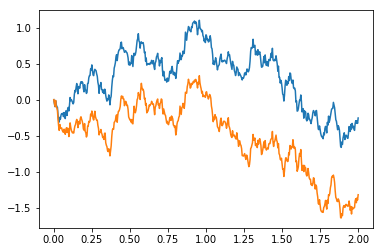

In [239]:
### Exercise 5
### Generate 10,000 paths of two correlated Wiener processes on the interval [0,2] 
### with 252 simulation steps per year and 0.9 correlation.
### Draw the first paths of both processes in one drawing.


n_paths = 10000
T = 2
n_steps_per_year = 252
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
rho = 0.9

N=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)
N2=rnd.randn(n_paths,n_steps) # Simulate a n_paths by n_steps matrix from a N(0,1)

paths_W1 = np.full((n_paths,n_steps+1),0.0)
paths_W2 = np.full((n_paths,n_steps+1),0.0)

for i in range(n_paths):
    for j in range(n_steps):
        paths_W1[i,j+1] = paths_W1[i,j] + np.sqrt(dt)*N[i,j]
        paths_W2[i,j+1] = paths_W2[i,j] + np.sqrt(dt)*N2[i,j]


paths_W2 = rho*paths_W1 + np.sqrt(1-rho**2)*paths_W2
t=np.r_[0,np.cumsum([dt] * n_steps)]

plt.plot(t,paths_W1[0,])
plt.plot(t,paths_W2[0,])

plt.show()


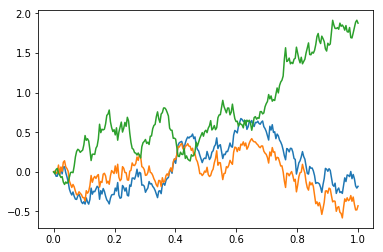

In [240]:
### Exercise 6
### Generate 100 paths of three correlated Wiener processes on the interval [0,1] 
### with 252 simulation steps per year and correlations rho(W1,W2=0.9, rho(W1,W3)=-0.7, rho(W2,W3)=-0.7.
### Draw the first paths of three processes in one drawing.


n_paths = 100
T = 1
n_steps_per_year = 252
n_steps = n_steps_per_year * T
dt = 1/n_steps_per_year
rho12 = 0.9
rho13 = -0.7
rho23 = -0.7

mean = [0, 0, 0]
corr_matrix = [[1,rho12,rho13], [rho12,1,rho23], [rho13,rho23,1]]

mN = np.random.multivariate_normal(mean, corr_matrix, n_paths*n_steps).T  #Generate samples from a multivariate normal distribution

dt = 1/n_steps

paths_W1 =  np.full((n_paths,n_steps+1),0.0)
paths_W2 =  np.full((n_paths,n_steps+1),0.0)
paths_W3 =  np.full((n_paths,n_steps+1),0.0)

for i in range(n_paths):
    for j in range(n_steps):
        paths_W1[i,j+1] = paths_W1[i,j]+np.sqrt(dt)*mN[0,i*n_steps+j]
        paths_W2[i,j+1] = paths_W2[i,j]+np.sqrt(dt)*mN[1,i*n_steps+j]
        paths_W3[i,j+1] = paths_W3[i,j]+np.sqrt(dt)*mN[2,i*n_steps+j]

t=np.r_[0,np.cumsum([dt] * n_steps)]

plt.plot(t,paths_W1[0,])
plt.plot(t,paths_W2[0,])
plt.plot(t,paths_W3[0,])

plt.show()
